# 02.분류에 추가하여 이미지도 해보기

In [ ]:
import matplotlib.pyplot as plt 
import random
from sklearn import datasets, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

## 01)데이터 읽기


In [ ]:
digits=datasets.load_digits()

## 02)이미지 표시

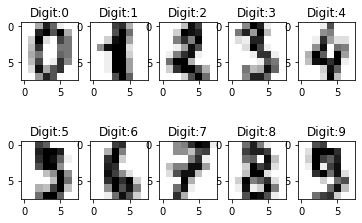

In [ ]:
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label +1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest') #interpolation: 보간법
    plt.title('Digit:{0}'.format(label))
plt.show()

# https://iskim3068.tistory.com/35 : 보간법 설명

In [ ]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
label, img # '9'라는 숫자가 의미하는 img

(9, array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]))

In [ ]:
img.shape

(8, 8)

In [ ]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
images = digits.images
labels = digits.target

In [ ]:
# 함수에 넣기 위해 차원을 하나 줄임 (8,8) 행렬 >> 64개의 벡터로 만들어 입력값으로 사용
images=images.reshape(images.shape[0], -1)

In [ ]:
images

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## 03)결정트리 생성

In [ ]:
len(images)

1797

In [ ]:
n_samples=len(images)
train_size=int(n_samples*2/3)
train_size

1198

In [ ]:
classifier = tree.DecisionTreeClassifier(max_depth=3) # depth(깊이): root node 에서 leaf node까지 거리
classifier.fit(images[:train_size], labels[:train_size])

DecisionTreeClassifier(max_depth=3)

## 04)결정트리 성능 확인

In [ ]:
expected=labels[train_size:] # test data
predicted=classifier.predict(images[train_size:])

In [ ]:
print('Accuracy:\n', accuracy_score(expected, predicted))
print()
print('confusion_matrix:\n', confusion_matrix(expected, predicted))
# 예측결과값 >> predicted 저장 , 실제값 : expected 저장 
# 혼동행렬 
# 실제값(actual) 세로방향, 예측값(predicted): 가로방향
# 대각선으로 숫자가 모여있을 수록 좋은 모델

Accuracy:
 0.44908180300500833

confusion_matrix:
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0  0 25 16  6  0  0 15  0  0]
 [ 1  0 49  6  0  1  0  3  0  0]
 [ 0  0 10 46  0  0  0  5  0  1]
 [ 4  0 27  0 30  0  0  1  0  0]
 [ 0  0  2 29 20  5  0  3  0  0]
 [ 0  0 55  5  0  1  0  0  0  0]
 [ 0  0  0  0  6  0  0 55  0  0]
 [ 0  0 33  6  2  1  0 13  0  0]
 [ 2  0  1 21  7  0  0  0  0 27]]


In [ ]:
expected # 실제값

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,

In [ ]:
predicted # 예측값

array([2, 2, 7, 7, 7, 2, 2, 0, 0, 2, 2, 7, 7, 2, 0, 7, 2, 2, 9, 3, 4, 3,
       3, 0, 2, 2, 2, 4, 3, 2, 7, 0, 3, 3, 2, 7, 2, 0, 0, 7, 7, 2, 3, 2,
       7, 4, 2, 2, 3, 7, 3, 9, 2, 7, 2, 7, 2, 3, 4, 4, 0, 7, 3, 2, 3, 2,
       4, 4, 5, 2, 4, 7, 2, 2, 2, 2, 5, 7, 3, 4, 2, 7, 2, 4, 9, 0, 7, 3,
       2, 0, 3, 2, 3, 2, 3, 2, 7, 2, 3, 0, 2, 3, 3, 0, 3, 2, 7, 2, 9, 0,
       3, 2, 3, 0, 3, 2, 7, 7, 9, 0, 9, 3, 3, 2, 4, 2, 3, 7, 3, 2, 2, 2,
       7, 7, 3, 3, 2, 0, 0, 2, 3, 7, 2, 3, 0, 3, 3, 2, 3, 3, 4, 2, 3, 0,
       2, 2, 2, 4, 9, 2, 3, 0, 9, 2, 2, 2, 3, 0, 0, 2, 7, 2, 3, 2, 2, 7,
       2, 2, 3, 7, 3, 2, 2, 7, 2, 7, 2, 3, 7, 4, 0, 4, 3, 5, 9, 2, 7, 7,
       4, 2, 2, 7, 3, 2, 2, 2, 3, 7, 3, 4, 2, 7, 4, 2, 0, 0, 7, 0, 3, 2,
       3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4,
       3, 2, 7, 2, 9, 0, 9, 3, 3, 2, 3, 0, 9, 2, 9, 2, 2, 3, 7, 4, 3, 3,
       3, 0, 0, 2, 2, 7, 3, 2, 0, 3, 2, 3, 3, 3, 7, 3, 3, 4, 2, 2, 2, 4,
       9, 3, 3, 0, 9, 3, 2, 2, 2, 0, 0, 3, 7, 3, 3,